<a href="https://colab.research.google.com/github/AtharvaSC03/ML-Projects/blob/main/Satellite_Image_Downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#⚡ Step 1: NASA Satellite Images (Simpler)

NASA provides MODIS and Landsat images via the Earthdata API. Example:
We can fetch satellite imagery using latitude, longitude, and date.

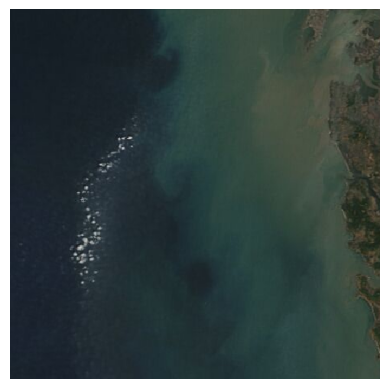

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError # Import UnidentifiedImageError directly from PIL
from io import BytesIO

# Example: NASA GIBS API endpoint
url = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?"
params = {
    "version": "1.1.1",   # Version parameter
    "TIME": "2023-01-01",   # Date
    "extent": "72,18,73,19",  # [minLon, minLat, maxLon, maxLat] -> e.g., Mumbai
    "epsg": "4326",
    "layers": "MODIS_Terra_CorrectedReflectance_TrueColor",
    "opacities": "1",
    "worldfile": "false",
    "format": "image/png",
    "width": "512",
    "height": "512",
    "request": "GetMap", # Specify the request type
    "srs": "EPSG:4326", # Specify the spatial reference system
    "bbox": "72,18,73,19", # Specify the bounding box
}

# Request image
response = requests.get(url, params=params)

# Display image
if response.status_code == 200:
    try:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    except UnidentifiedImageError:
        print("The response content is not a valid image.")
        print("Response content type:", response.headers.get('Content-Type'))
        print("Response content (first 1000 characters):", response.text[:1000])
else:
    print("Error:", response.status_code)
    print("Response content:", response.text)

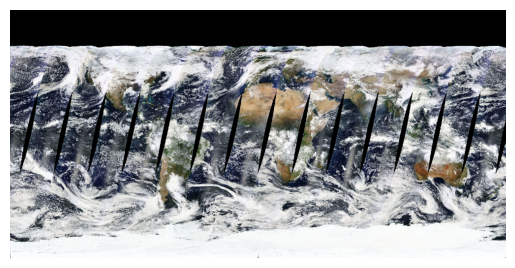

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from io import BytesIO

# Example: NASA GIBS API endpoint
url = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?"
params = {
    "version": "1.1.1",   # Version parameter
    "TIME": "2023-01-01",   # Date
    "extent": "-180,-90,180,90",  # World extent [minLon, minLat, maxLon, maxLat]
    "epsg": "4326",
    "layers": "MODIS_Terra_CorrectedReflectance_TrueColor",
    "opacities": "1",
    "worldfile": "false",
    "format": "image/png",
    "width": "1024", # Increased width for better resolution
    "height": "512", # Adjusted height to maintain aspect ratio for world map
    "request": "GetMap", # Specify the request type
    "srs": "EPSG:4326", # Specify the spatial reference system
    "bbox": "-180,-90,180,90", # World bounding box
}

# Request image
response = requests.get(url, params=params)

# Display image
if response.status_code == 200:
    try:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    except UnidentifiedImageError:
        print("The response content is not a valid image.")
        print("Response content type:", response.headers.get('Content-Type'))
        print("Response content (first 1000 characters):", response.text[:1000])
else:
    print("Error:", response.status_code)
    print("Response content:", response.text)

# ⚡ Step 2: Google Earth Engine (Advanced)

Google Earth Engine gives access to huge datasets (NDVI, rainfall, crop health, etc.).

In [ ]:
import ee
import geemap

# Initialize & Authenticate the Earth Engine module
ee.Authenticate()
ee.Initialize(project="for-alpha-earth")

In [ ]:
# Define region (Mumbai)
region = ee.Geometry.Rectangle([72.7, 18.8, 73.0, 19.3])
# Load MODIS NDVI dataset
dataset = ee.ImageCollection("MODIS/006/MOD13A2").select('NDVI').filterDate('2023-01-01', '2023-01-31')

/usr/local/lib/python3.11/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for MODIS/006/MOD13A2! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13A2

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
ndvi = dataset.mean()

In [ ]:
map = geemap.Map()
map.centerObject(region, 8)
map.addLayer(ndvi.select('NDVI'), {"min": 0, "max": 9000, "palette": ["white", "green"]}, "NDVI") # Select the 'NDVI' band
map

Map(center=[19.049935018708513, 72.85000000000034], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
task = ee.batch.Export.image.toDrive(
    image=ndvi,
    description='NDVI_January2023',
    scale=500,
    region=region.getInfo()['coordinates']
)
task.start()


In [ ]:
region = ee.Geometry.Rectangle([72.7, 18.8, 73.0, 19.3])
dataset = ee.ImageCollection("MODIS/006/MOD13A2").select('NDVI').filterDate('2023-01-01', '2023-01-31')
ndvi = dataset.mean()

In [ ]:
map = geemap.Map()
map.centerObject(region, 5)
map.addLayer(ndvi.select('NDVI'),{'min':0,'max':9000,"palette": ["white", "skyblue"]}, "NDVI")
map

Map(center=[19.049935018708513, 72.85000000000034], controls=(WidgetControl(options=['position', 'transparent_…

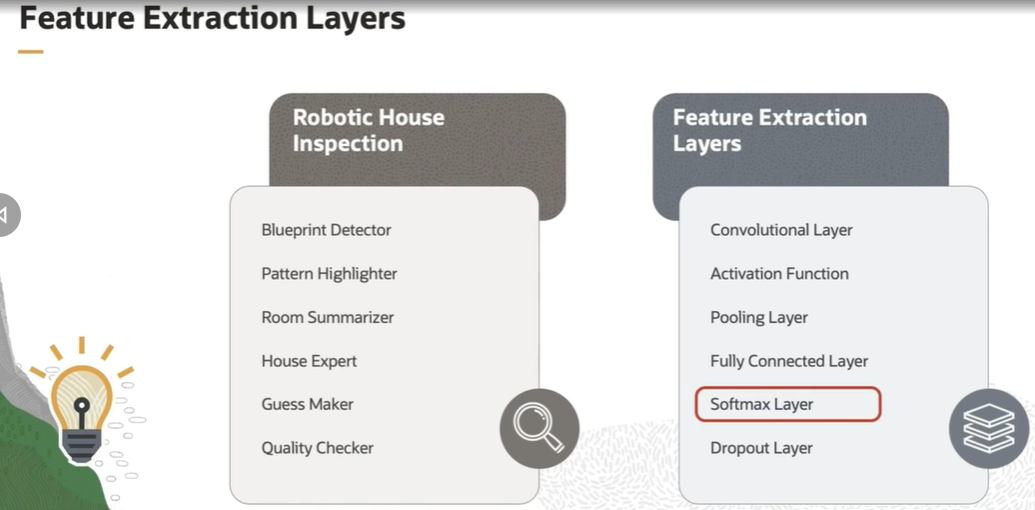